In [9]:
import pickle
import ipywidgets as widgets
from verticapy.performance.vertica import QueryProfilerInterface, QueryProfiler

output_initial = widgets.Output()

with output_initial:
    %store -r query_val
    %store -r key_val
    %store -r target_schema_val
    %store -r transaction_val
    %store -r statement_val
    %store -r file_val

    if "file_val" in globals():
        qprof = QueryProfiler.import_profile(target_schema=target_schema_val,
            key_id=key_val,
            filename=file_val,
            auto_initialize = False                                          
        )
        qprof = QueryProfilerInterface(
            target_schema = target_schema_val,
            key_id = key_val,
        )
    elif "target_schema_val" in globals():
        qprof = QueryProfilerInterface(
            target_schema = target_schema_val,
            key_id = key_val,
        )
    elif "query_val" in globals():
        qprof = QueryProfilerInterface(
            query_val
        )
    elif "transaction_val" in globals():
        qprof = QueryProfilerInterface(
            transactions = (transaction_val, statement_val)
        )

In [2]:
button_qprof_save = widgets.Button(description="Save Query Plan", 
                                   # button_style='warning', 
                                   # layout=widgets.Layout(background_color='#007bff')
                                  )
output_export = widgets.Output()

def click_export_query(_):
    output_export.clear_output(wait=True)
    with output_export:
        print("Saving Query...It may take a while")
        qprof.export_profile(filename="qprof.tar")
        print("Ready to Download")
        display(download_button)

button_qprof_save.on_click(click_export_query)

qpof_save = widgets.VBox([button_qprof_save, output_export])

In [3]:

from ipywidgets import HTML
from IPython.display import display


def create_download_link(filepath):
    return f'''
    <html>
    <head>
    <meta name="viewport" content="width=device-width, initial-scale=1">
    </head>
    <body>
    <a download href="{filepath}" download>
    <button style="background-color: #007bff;" class="lm-Widget jupyter-widgets jupyter-button widget-button">Download File</button>
    </a>
    </body>
    </html>
    '''

# Example usage
filepath = 'qprof.tar'
download_button = HTML(create_download_link(filepath))

In [4]:
# Define the URLs for the links
url1 = "http://127.0.0.1:8889/voila/render/ui/qprof_main.ipynb"
# Define the button labels
button_label1 = "Go Back"
# Define HTML links for button
button_html1 = f"<a href='{url1}' style='text-decoration: none; padding: 5px; background-color: #007bff; color: white; border-radius: 5px; margin-right: 5px;'><i class='fa fa-arrow-left'></i></a>"
html_button1 = widgets.HTML(value=button_html1)



In [5]:
display(widgets.HBox([html_button1,button_qprof_save]))
display(output_export)

Output()

In [6]:
from IPython.display import display,clear_output, IFrame, HTML
html_code = '''
<!DOCTYPE html>
<html>
<meta charset="utf-8">
<head>
    <link rel="modulepreload" href="https://d3js.org/d3.v5.min.js" >

</head>
<body>
    <div id="graph" style="text-align: center;"></div>
    <script src="https://d3js.org/d3.v5.min.js" type="module"></script>
    <script src="https://unpkg.com/@hpcc-js/wasm@0.3.11/dist/index.min.js"></script>
    <script src="https://unpkg.com/d3-graphviz@3.0.5/build/d3-graphviz.js"></script>
</body>
</html>
'''

In [7]:
display(HTML(html_code))

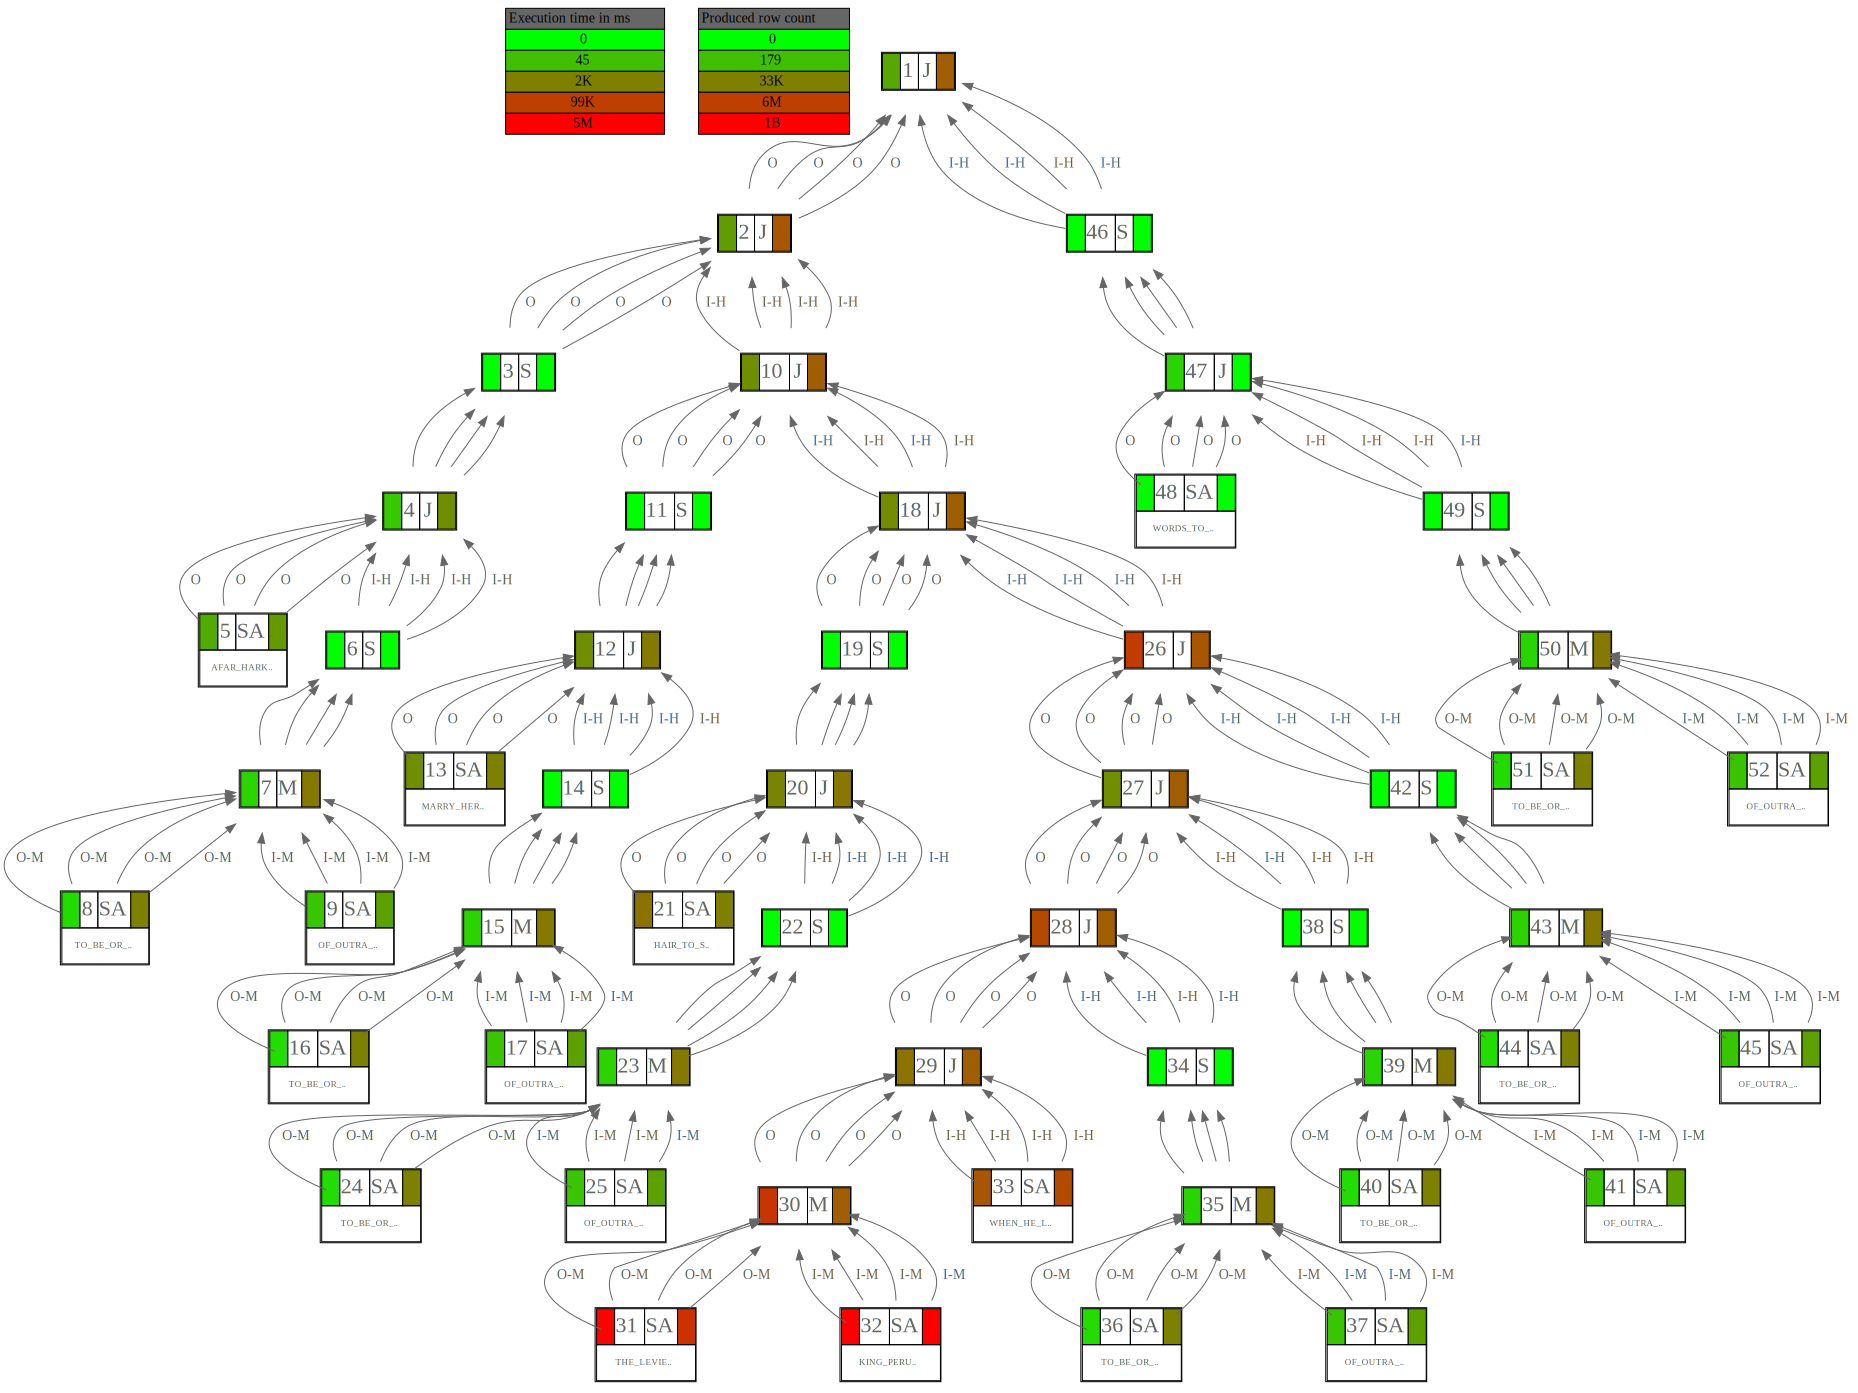

In [8]:
qprof.get_qplan_tree()